<a href="https://colab.research.google.com/github/year2eyo/Intelligence_/blob/main/HW_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets

# X와 y 변수에 당뇨 데이터를 따로 분리해서 가져옴
X, y = datasets.load_diabetes(return_X_y=True)

# X_new 변수 = 2차원 + 세번째 데이터를 가져옴 (442, 1 행렬)
X_new = X[:, np.newaxis, 2]

In [16]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 테스트 데이터를 나눠줌
# 10퍼 센트만 테스트 셋으로 사용할거임
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.1, random_state=0)


X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(397, 1)
(397, 1)
(45, 1)
(45, 1)


In [17]:
# 시작점을 찾아야함  -> 학습할 파라미터
W = 0
b = 0

l_rate = 0.01  # 학습률 = 알파
epochs = 1000  # 반복 횟수


In [23]:
array_w = []    # 경사하강법 기울기에 해당하는 결과 값들 집합
array_b=[]      # 경사하강법 절편에 해당하는 결과 값들 집합

# 경사하강법
for i in range (epochs):
  y_pred = W * X_train + b # 예측값  / y1 = w*x1+b , y2 = w*x2+b , y3= w*x3 +b
  array_w.append(W)
  array_b.append(b)

  dW = (2/len(X_train))  * np.sum(X_train * (y_pred - y_train ))
  db = (2/len(X_train))  * np.sum( (y_pred - y_train ))
  W = W -l_rate * dW
  b = b - l_rate *db

# 경사하강법에서 나온 기울기와 절편
print(W,b)

print(X_test.shape)
print(y_pred.shape)

84.74965436588901 150.79678975345254
(45, 1)
(397, 1)


In [24]:
array_w = np.array(array_w)
array_b = np.array(array_b)

"""
print(array_w)
print(array_b)
"""

'\nprint(array_w)\nprint(array_b)\n'

In [25]:
# 예측 값을 만듦
y_pred = W *X_test + b

print(y_pred.shape)

(45, 1)


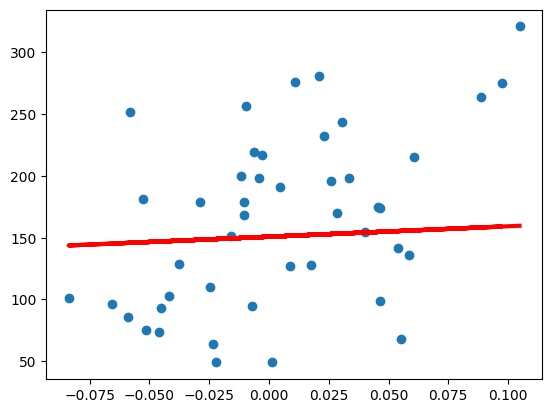

In [26]:
import matplotlib.pylab as plt

y_pred = y_pred.flatten()
X_test = X_test.flatten()

plt.scatter(X_test,y_test)  # x,y 의 점을 찍음

plt.plot (X_test, y_pred, color ='red', linewidth = 3)
plt.show()